| ID       | Name                       | 
| --------- | -------------------------- |
| 202253350 | ALBAQQAL, HUSSAIN      |
| 202256620 | ALDAHAN, HAIDAR       |
| 202244960 | ALEID, REDA      |    
| 202257340 | ALBAHHAR, MOHAMMED        | 
| 202283220 | ALJARRASH, RIDHA     | RIDHA     |

# <span style="color:blue">**1. Discovery:** </span>
#### **a.** 

<span style="color:red"> **The choosen data is about:**</span> <span style="color:purple"> **The streaming platform Twitch.tv**</span>

#### **b.**

<span style="color:red"> **Problem:**</span> Twitch is a popular platform for live streaming, and streamers vary significantly in their performance metrics. Understanding the factors that contribute to a successful stream can help streamers optimize their performance and attract more viewers. Given the dataset, there is a need to analyze which variables most significantly impact streaming success and identify patterns or insights that can guide streamers in improving their channels.

<span style="color:red"> **Objective:** </span> 1. Identify key factors influencing viewer engagement (views).
2. Predict peak streaming times.
3. Evaluate the impact of streaming duration on viewer count.

# <span style="color:blue">**2. Data Preparation** </span>
#### **a.** Read the selected data, list the fields/variables, and identify their types. 
#### **b.** List the inconsistencies, missing data, and outliers. 
#### Fix the inconsistencies, impute the missing data, and remove the outliers.

In [1]:
import pandas as pd
import numpy as np


# Load the data from the Excel file
df = pd.read_csv('Twitch-Data.csv')

display(df.head())
display(df.info())



RANK      NAME LANGUAGE         TYPE              MOST_STREAMED_GAME  \
0     1  kaicenat  English  personality                   Just Chatting   
1     2    jynxzi  English  personality  Tom Clancy's Rainbow Six Siege   
2     3   caedrel  English  personality               League of Legends   
3     4   caseoh_  English  personality                        NBA 2K23   
4     5      ibai  Spanish  personality                   Just Chatting   

  2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
0      I'm Only Sleeping                      7.6   
1               NBA 2K20                      5.4   
2      I'm Only Sleeping                      6.3   
3          Just Chatting                      4.6   
4      League of Legends                      4.1   

   FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  \
0                        18405                   15852                   2.3   
1                         3386                    1145                   1.2   
2                          689                   12331                   1.3   
3                         7185                       0                   3.6   
4                         8289                  190714                   1.5   

   TOTAL_TIME_STREAMED  TOTAL_FOLLOWERS  TOTAL_VIEWS  TOTAL_GAMES_STREAMED  \
0                 4698         10600000      9150000                   194   
1                 8407          5760000      1950000                    54   
2                 6728           797000     14200000                   111   
3                 2554          4220000           53                   385   
4                 6865         15600000    359000000                   149   

   ACTIVE_DAYS_PER_WEEK MOST_ACTIVE_DAY DAY_WITH_MOST_FOLLOWERS_GAINED  
0                   3.6          Friday                       Saturday  
1                   5.6         Tuesday                         Sunday  
2                   2.8        Thursday                         Sunday  
3                   6.2          Friday                         Monday  
4                   4.3       Wednesday                       Saturday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    int64  
 8   AVG_VIEWERS_PER_STREAM          999 non-null    int64  
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    int64  
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

None

In [2]:
# testing the inconsistency.

# First, dropping the useless columns: 
df.drop('RANK', axis=1, inplace= True)
df.drop('DAY_WITH_MOST_FOLLOWERS_GAINED', axis=1, inplace= True)
#Run once then return to comment

# Identifying the numerical and categorical columns.
cat_cols= df.select_dtypes('object').columns
num_cols= df.select_dtypes(exclude='object').columns


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for unexpected values
unexpected_values = df[(df[num_cols] < 0).any(axis=1)]
display("Rows with unexpected negative values:", unexpected_values)
#There is no inconsistency



Number of duplicate rows: 0


'Rows with unexpected negative values:'

NAME    LANGUAGE         TYPE MOST_STREAMED_GAME  \
608     hudson_om  Portuguese  personality     Virtual Casino   
709  luxurygirl_c     Russian  personality             Casino   

    2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
608                    NaN                     14.1   
709                    NaN                      7.2   

     FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  \
608                        -4240                       0   
709                        -1277                       0   

     AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  TOTAL_FOLLOWERS  TOTAL_VIEWS  \
608                   1.0                  560                1            0   
709                   1.0                  140                0            0   

     TOTAL_GAMES_STREAMED  ACTIVE_DAYS_PER_WEEK MOST_ACTIVE_DAY  
608                     1                   2.3       Wednesday  
709                     1                   1.4          Friday

# <span style ="color:red"> **Conclusion of the above data:** </span>
### <span style="color:green">Missng values:</span>
**There are missing values in the column 2ND_MOST_STREAMED_GAME :<span style="color:red"> 2ND_MOST_STREAMED_GAME   ,      922 non-null , object</span>**
**that needs to be dealt with**

### <span style="color:green">Duplicates:</span>
**Zero duplicate rows were found**

### <span style="color:green">Unexpected values:</span>
**The rows : (608,709) had negative numerical values in the column: <span style="color:red">FOLLOWERS_GAINED_PER_STREAM</span>**
**It could be an error but we can also conclude that the streamer have been lossing followers instade of gaining per stream**

In [3]:
#Handling the missing values:
# Numeric columns are filled with the average value and categorical columns with the most common value

# Check for missing values
columns_with_missing_data = df.columns[df.isnull().any()]
print(columns_with_missing_data)


# Iterate over each column and fill missing values appropriately
for column in columns_with_missing_data:
    if df[column].dtype != 'object':
        # Calculate the mean for numeric columns
        fill_value = df[column].mean()
    else:
        # Determine the mode for categorical columns
        mode_value = df[column].mode()
        fill_value = mode_value[0]
    
    # Replace missing values in the dataframe
    df[column].fillna(fill_value, inplace=True)
    
    
df = df.apply(lambda x: x.replace(0, x.mean()) if x.dtype != 'object' else x)

display(df)
display(df.info())

Index(['2ND_MOST_STREAMED_GAME'], dtype='object')


C:\Users\redaa\AppData\Local\Temp\ipykernel_37048\1232688593.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(fill_value, inplace=True)


NAME    LANGUAGE         TYPE              MOST_STREAMED_GAME  \
0       kaicenat     English  personality                   Just Chatting   
1         jynxzi     English  personality  Tom Clancy's Rainbow Six Siege   
2        caedrel     English  personality               League of Legends   
3        caseoh_     English  personality                        NBA 2K23   
4           ibai     Spanish  personality                   Just Chatting   
..           ...         ...          ...                             ...   
994        jlcs2     English  personality                  Counter-Strike   
995     nobru_xy  Portuguese  personality                  Virtual Casino   
996     buxexa_t  Portuguese  personality                  Virtual Casino   
997  sweetdreams     English  personality                    Apex Legends   
998  giantwaffle     English  personality                       Minecraft   

    2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
0        I'm Only Sleeping                      7.6   
1                 NBA 2K20                      5.4   
2        I'm Only Sleeping                      6.3   
3            Just Chatting                      4.6   
4        League of Legends                      4.1   
..                     ...                      ...   
994          Just Chatting                      4.0   
995          Just Chatting                     10.4   
996                  Slots                      9.6   
997      Z1: Battle Royale                      5.1   
998          Just Chatting                      7.9   

     FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  \
0                        18405.0            15852.000000   
1                         3386.0             1145.000000   
2                          689.0            12331.000000   
3                         7185.0            19595.082082   
4                         8289.0           190714.000000   
..                           ...                     ...   
994                       2480.0             1423.000000   
995                       8740.0            19595.082082   
996                       2160.0            19595.082082   
997                       6050.0             1619.000000   
998                        970.0            21465.000000   

     AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  TOTAL_FOLLOWERS   TOTAL_VIEWS  \
0                     2.3                 4698       10600000.0  9.150000e+06   
1                     1.2                 8407        5760000.0  1.950000e+06   
2                     1.3                 6728         797000.0  1.420000e+07   
3                     3.6                 2554        4220000.0  5.300000e+01   
4                     1.5                 6865       15600000.0  3.590000e+08   
..                    ...                  ...              ...           ...   
994                   1.3                 1873         133000.0  7.660000e+05   
995                   1.0                  210           1300.0  3.001478e+07   
996                   1.0                  190           1300.0  3.001478e+07   
997                   1.1                 6827         837000.0  2.240000e+07   
998                   2.7                19426         856000.0  7.450000e+07   

     TOTAL_GAMES_STREAMED  ACTIVE_DAYS_PER_WEEK MOST_ACTIVE_DAY  
0                     194                   3.6          Friday  
1                      54                   5.6         Tuesday  
2                     111                   2.8        Thursday  
3                     385                   6.2          Friday  
4                     149                   4.3       Wednesday  
..                    ...                   ...             ...  
994                    31                   1.8          Monday  
995                     1                   0.8          Friday  
996                     2                   0.4        Thursday  
997                    24                   3.6         Tuesday  
998   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME                         999 non-null    object 
 1   LANGUAGE                     999 non-null    object 
 2   TYPE                         999 non-null    object 
 3   MOST_STREAMED_GAME           999 non-null    object 
 4   2ND_MOST_STREAMED_GAME       999 non-null    object 
 5   AVERAGE_STREAM_DURATION      999 non-null    float64
 6   FOLLOWERS_GAINED_PER_STREAM  999 non-null    float64
 7   AVG_VIEWERS_PER_STREAM       999 non-null    float64
 8   AVG_GAMES_PER_STREAM         999 non-null    float64
 9   TOTAL_TIME_STREAMED          999 non-null    int64  
 10  TOTAL_FOLLOWERS              999 non-null    float64
 11  TOTAL_VIEWS                  999 non-null    float64
 12  TOTAL_GAMES_STREAMED         999 non-null    int64  
 13  ACTIVE_DAYS_PER_WEEK

None

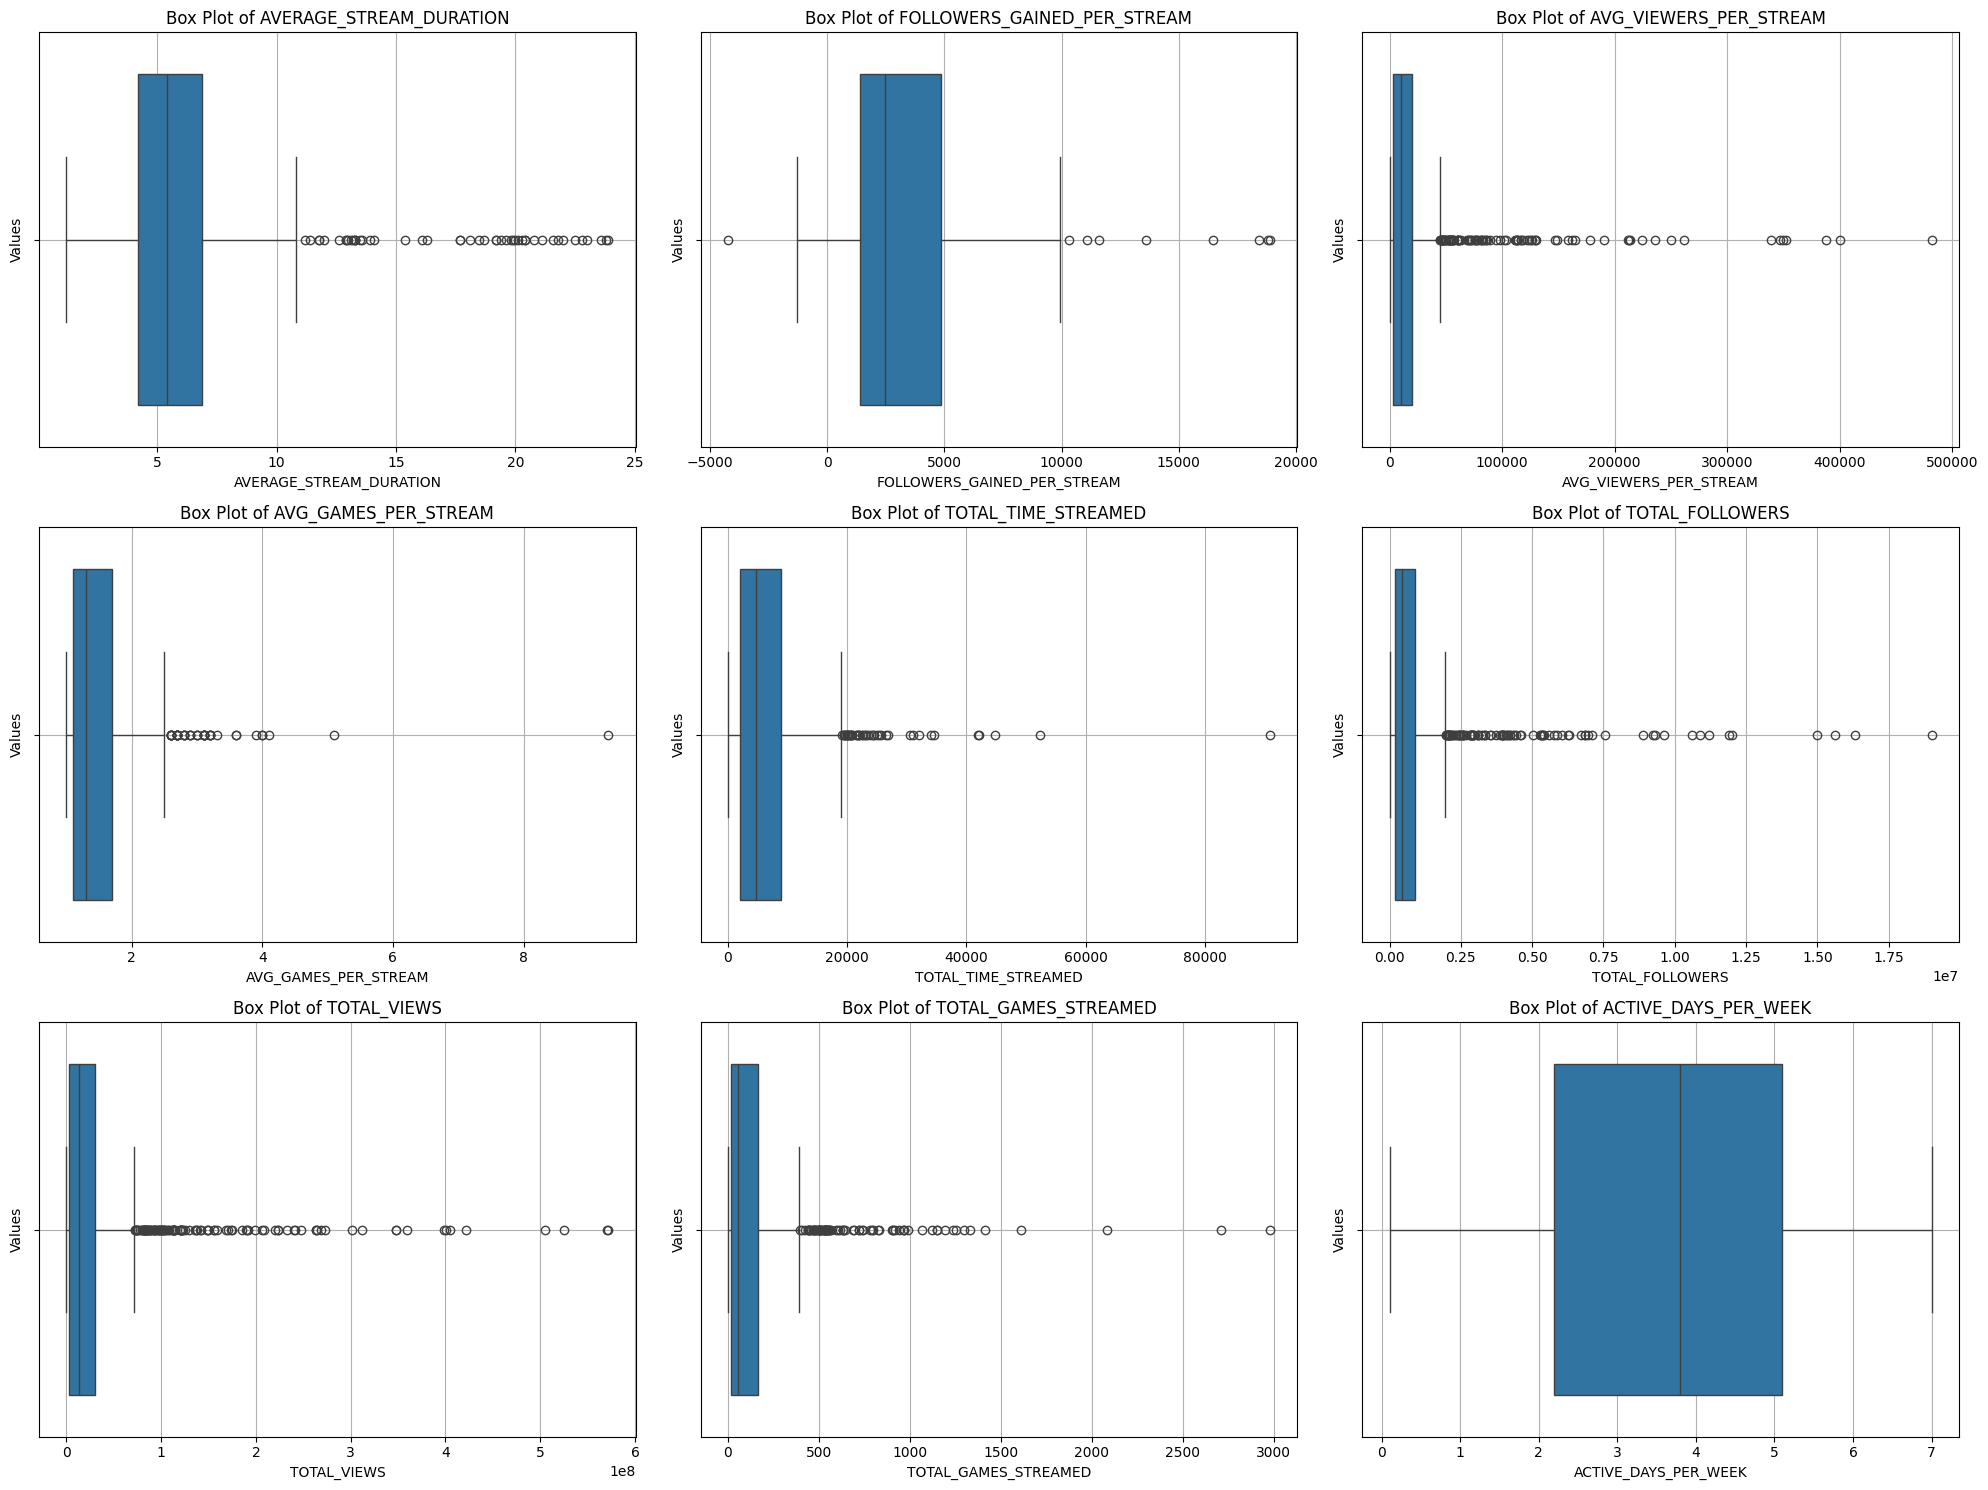

In [4]:
# Using boxplot to identify outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of subplots needed
num_vars = df.select_dtypes(include=[np.number]).shape[1] 
cols_per_row = 3  # Number of columns in subplot grid
num_rows = (num_vars + cols_per_row - 1) // cols_per_row  # Calculate required number of rows

plt.figure(figsize=(20, 5 * num_rows))  #  figure size

for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(num_rows, cols_per_row, i + 1)  # Create subplot for each column
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Values", fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [5]:
# Define a function to identify outliers
def find_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)




for column in num_cols:
    outliers = find_outliers(df[column])
#outliers is a boolean Series where each entry corresponds to whether the value in the column is an outlier (True) or not (False).
    print(f"Outliers in {column}: {df[outliers].shape[0]}")

outliers = df[num_cols].apply(find_outliers)

# Remove rows with outliers in numerical columns
df = df[~outliers.any(axis=1)]

print("\nDataFrame after removing outliers from numerical columns:")
display(df)

Outliers in AVERAGE_STREAM_DURATION: 48
Outliers in FOLLOWERS_GAINED_PER_STREAM: 9
Outliers in AVG_VIEWERS_PER_STREAM: 95
Outliers in AVG_GAMES_PER_STREAM: 43
Outliers in TOTAL_TIME_STREAMED: 43
Outliers in TOTAL_FOLLOWERS: 96
Outliers in TOTAL_VIEWS: 117
Outliers in TOTAL_GAMES_STREAMED: 83
Outliers in ACTIVE_DAYS_PER_WEEK: 0

DataFrame after removing outliers from numerical columns:


NAME    LANGUAGE         TYPE  MOST_STREAMED_GAME  \
2             caedrel     English  personality   League of Legends   
10   dota2_paragon_ru     Russian  personality              Dota 2   
12   kato_junichi0817    Japanese  personality        Apex Legends   
17           playapex     English      esports        Apex Legends   
22      raderaderader    Japanese  personality  Grand Theft Auto V   
..                ...         ...          ...                 ...   
993        nacho_dayo    Japanese  personality            VALORANT   
994             jlcs2     English  personality      Counter-Strike   
995          nobru_xy  Portuguese  personality      Virtual Casino   
996          buxexa_t  Portuguese  personality      Virtual Casino   
997       sweetdreams     English  personality        Apex Legends   

    2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
2        I'm Only Sleeping                      6.3   
10           Just Chatting                     10.7   
12                VALORANT                      6.3   
17                 Variety                      5.3   
22               Minecraft                      3.8   
..                     ...                      ...   
993          Just Chatting                      5.1   
994          Just Chatting                      4.0   
995          Just Chatting                     10.4   
996                  Slots                      9.6   
997      Z1: Battle Royale                      5.1   

     FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  \
2                          689.0            12331.000000   
10                        1629.0            19595.082082   
12                        5460.0            23768.000000   
17                        5908.0             8679.000000   
22                        4060.0              507.000000   
..                           ...                     ...   
993                       6290.0             2492.000000   
994                       2480.0             1423.000000   
995                       8740.0            19595.082082   
996                       2160.0            19595.082082   
997                       6050.0             1619.000000   

     AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  TOTAL_FOLLOWERS   TOTAL_VIEWS  \
2                     1.3                 6728         797000.0  1.420000e+07   
10                    1.0                 2291         352000.0  3.001478e+07   
12                    1.2                   67         939000.0  3.840000e+07   
17                    1.0                 1056        1210000.0  1.780000e+07   
22                    1.2                 5974         689000.0  8.610000e+06   
..                    ...                  ...              ...           ...   
993                   1.4                 3001         396000.0  1.570000e+06   
994                   1.3                 1873         133000.0  7.660000e+05   
995                   1.0                  210           1300.0  3.001478e+07   
996                   1.0                  190           1300.0  3.001478e+07   
997                   1.1                 6827         837000.0  2.240000e+07   

     TOTAL_GAMES_STREAMED  ACTIVE_DAYS_PER_WEEK MOST_ACTIVE_DAY  
2                     111                   2.8        Thursday  
10                      1                   2.8         Tuesday  
12                    136                   5.2        Saturday  
17                      2                   0.7          Monday  
22                    172                   4.1        Saturday  
..                    ...                   ...             ...  
993                   142                   1.9        Saturday  
994                    31                   1.8          Monday  
995                     1                   0.8          Friday  
996                     2                   0.4        Thursday  
997                    24                   3.6         Tuesday  

[702 rows x 15 columns]

# <span style="color:blue">**3. Model Planning:**</span>
#### a. **Run** the exploratory data analysis:
    i. Find the statistical summaries.
    ii. Make univariate graphs (i.e., graphs based on single variable).
    iii. Prepare bivariate plots (i.e., plots based on two variables).
    iv. Portray advanced graphs (i.e., graphs based on more than two variables).
    v. Assess the relationship between variables
#### b. **Summarise** your findings. 

In [6]:
display(cat_cols)
display(num_cols)

# Statistical summaries for numerical columns
display(df.describe())


display(df[cat_cols].describe())



Index(['NAME', 'LANGUAGE', 'TYPE', 'MOST_STREAMED_GAME',
       '2ND_MOST_STREAMED_GAME', 'MOST_ACTIVE_DAY'],
      dtype='object')

Index(['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM',
       'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED',
       'TOTAL_FOLLOWERS', 'TOTAL_VIEWS', 'TOTAL_GAMES_STREAMED',
       'ACTIVE_DAYS_PER_WEEK'],
      dtype='object')

AVERAGE_STREAM_DURATION  FOLLOWERS_GAINED_PER_STREAM  \
count               702.000000                   702.000000   
mean                  5.241026                  3368.111435   
std                   1.747523                  2511.736418   
min                   1.200000                 -1277.000000   
25%                   4.000000                  1391.500000   
50%                   5.200000                  2540.000000   
75%                   6.300000                  4780.000000   
max                  10.800000                  9910.000000   

       AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  TOTAL_TIME_STREAMED  \
count              702.000000            702.000000           702.000000   
mean             10427.079133              1.358405          4941.930199   
std               9570.008741              0.360190          4021.489253   
min                 10.000000              1.000000            27.000000   
25%               2705.000000              1.100000          1912.500000   
50%               7052.500000              1.300000          3972.500000   
75%              19595.082082              1.600000          7263.000000   
max              44292.000000              2.500000         18972.000000   

       TOTAL_FOLLOWERS   TOTAL_VIEWS  TOTAL_GAMES_STREAMED  \
count     7.020000e+02  7.020000e+02            702.000000   
mean      4.662517e+05  1.283253e+07             77.139601   
std       4.036248e+05  1.477633e+07             85.283870   
min       1.000000e+00  2.000000e+00              1.000000   
25%       1.690000e+05  1.180000e+06             15.000000   
50%       3.570000e+05  6.260000e+06             46.000000   
75%       6.430000e+05  2.267500e+07            106.750000   
max       1.960000e+06  7.110000e+07            393.000000   

       ACTIVE_DAYS_PER_WEEK  
count            702.000000  
mean               3.329345  
std                1.671877  
min                0.100000  
25%                2.000000  
50%                3.500000  
75%                4.500000  
max                7.000000

NAME LANGUAGE         TYPE MOST_STREAMED_GAME  \
count           702      702          702                702   
unique          702       19            2                 87   
top     sweetdreams  English  personality      Just Chatting   
freq              1      269          677                178   

       2ND_MOST_STREAMED_GAME MOST_ACTIVE_DAY  
count                     702             702  
unique                    137               7  
top             Just Chatting         Tuesday  
freq                      160             130

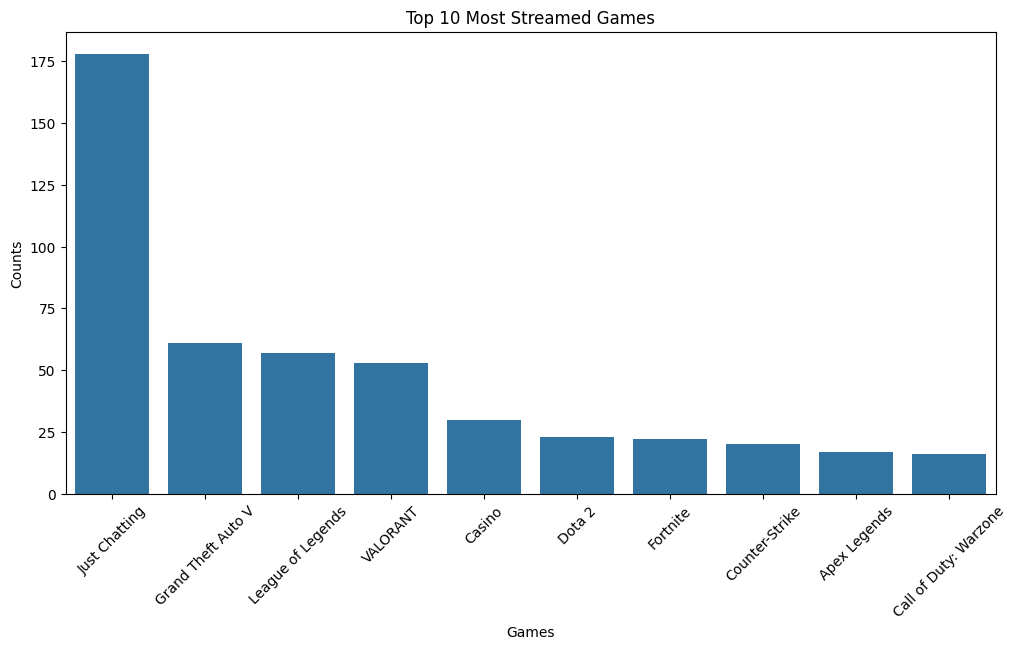

In [7]:
game_counts = df['MOST_STREAMED_GAME'].value_counts().head(10)  # Top 10 most streamed games
plt.figure(figsize=(12, 6))
sns.barplot(x=game_counts.index, y=game_counts.values)
plt.title('Top 10 Most Streamed Games')
plt.xlabel('Games')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

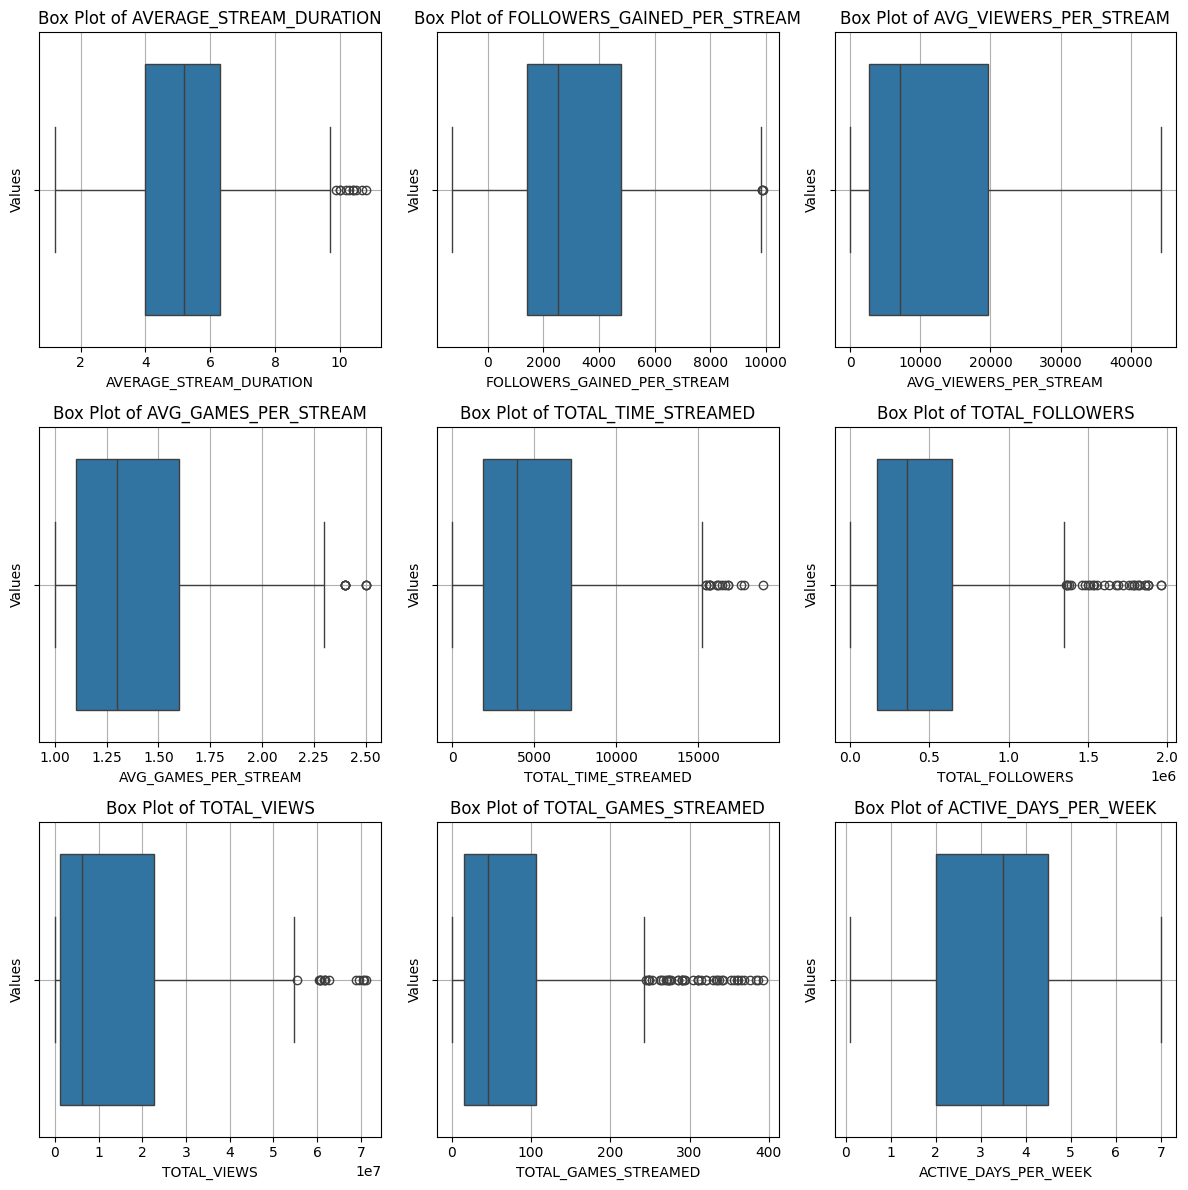

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only the numerical columns for the boxplot:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Determine the number of rows and columns for the subplots
numb_cols = numerical_df.shape[1]
cols_per_row = 3  # Define how many plots per row you want
num_rows = (numb_cols + cols_per_row - 1) // cols_per_row  # Calculate required number of rows

# Create a figure with subplots
plt.figure(figsize=(12, num_rows * 4))  # Adjust size as needed

for i, column in enumerate(numerical_df.columns):
    ax = plt.subplot(num_rows, cols_per_row, i + 1)
    sns.boxplot(x=numerical_df[column], ax=ax)
    plt.title(f"Box Plot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel("Values", fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

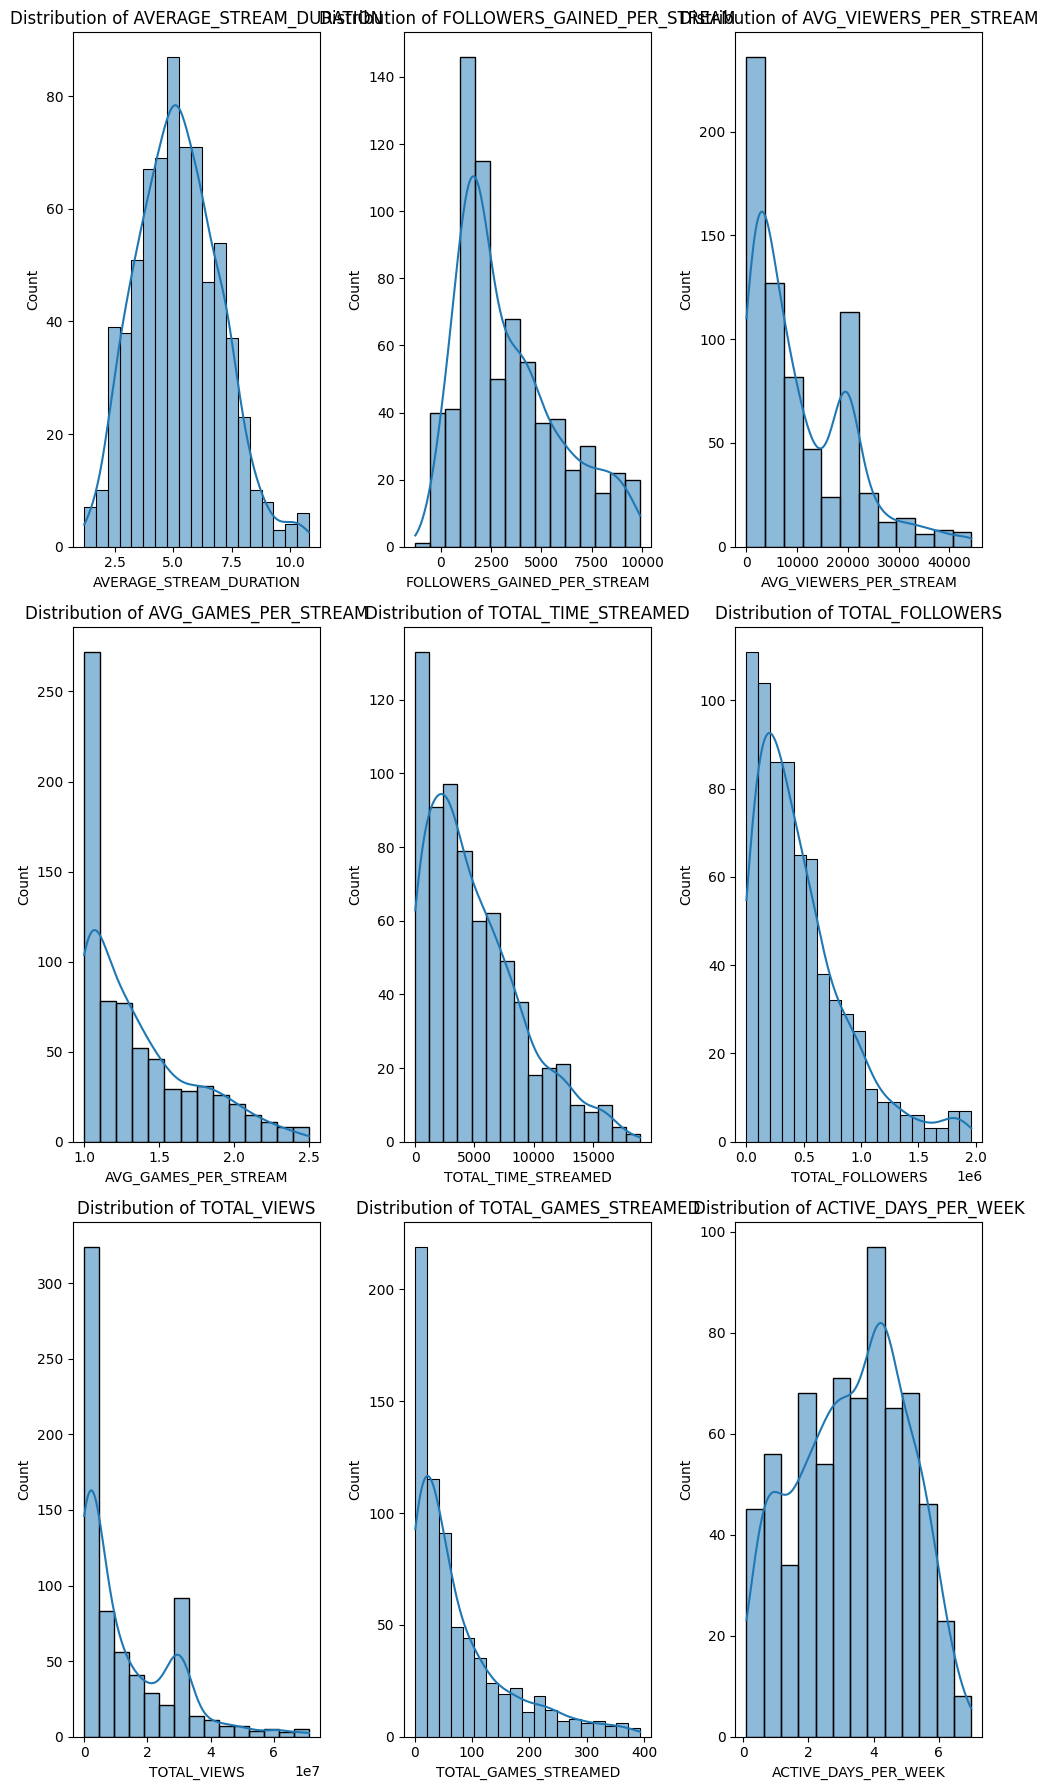

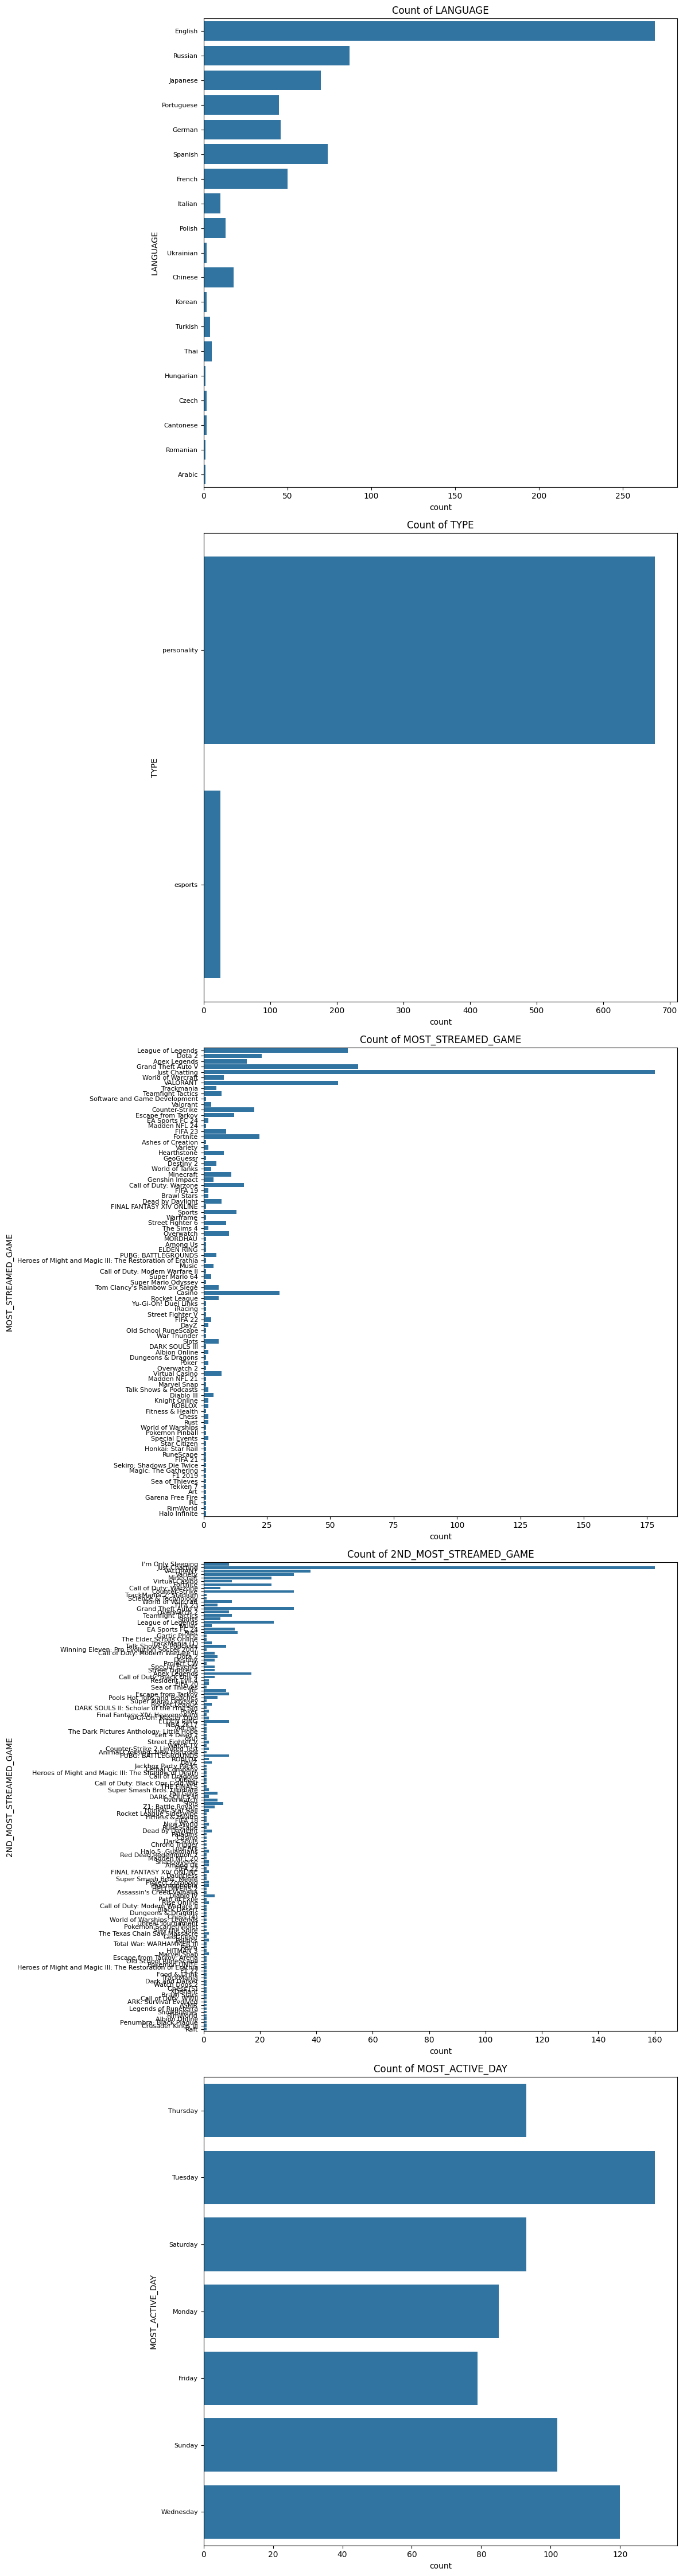

In [9]:

# Calculate rows needed
num_rows = (len(num_cols) + 2) // 3  # 3 columns per row

# Setting up figure histograms
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 6 * num_rows))
axes = axes.flatten()  # Flatten to 1D array if necessary
for ax, column in zip(axes, num_cols):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f'Distribution of {column}')

for ax in axes[len(num_cols):]:
    ax.set_visible(False)

fig.tight_layout()
plt.show()

cat_columns_ex = df.select_dtypes(include=['object']).columns.drop('NAME')  # Exclude 'NAME'
fig, axes = plt.subplots(nrows=len(cat_columns_ex), figsize=(12, 9 * len(cat_columns_ex)))
for ax, column in zip(axes, cat_columns_ex):
    sns.countplot(y=df[column], ax=ax)
    ax.set_title(f'Count of {column}', fontsize=12)  # Adjust title font size
    ax.set_ylabel(column, fontsize=10)  # Adjust y-axis label font size
    ax.tick_params(axis='y', labelsize=8)  # Adjust y-axis tick label font size

fig.tight_layout()
plt.show()

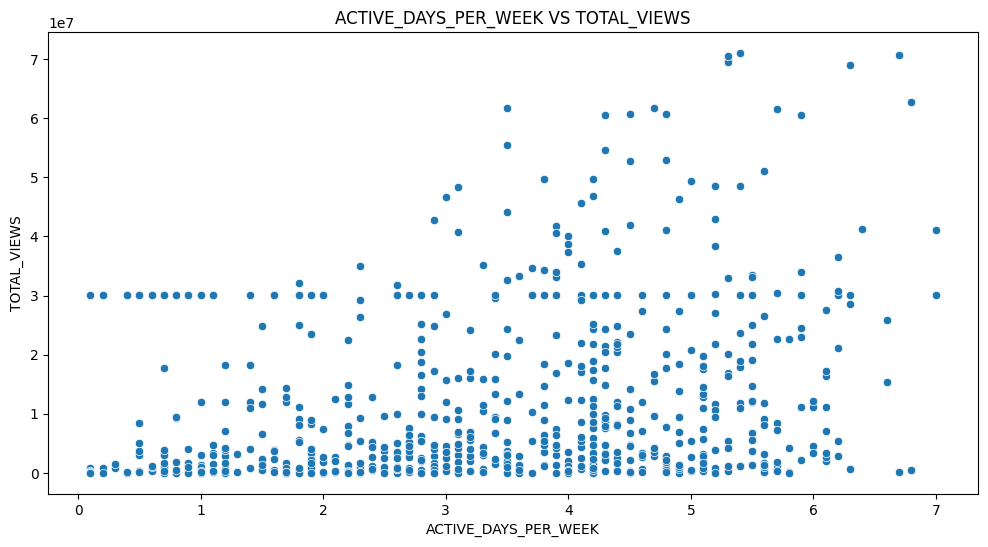

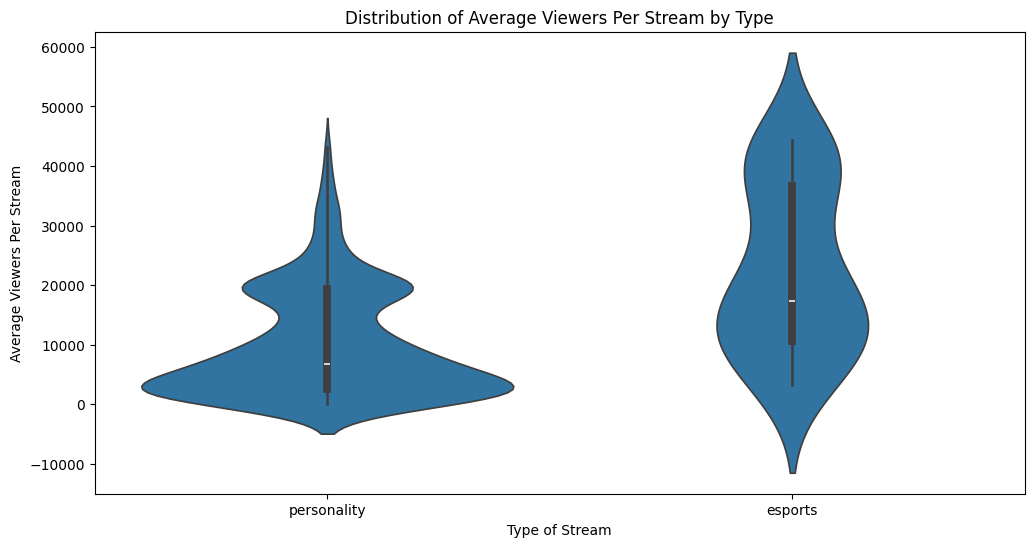

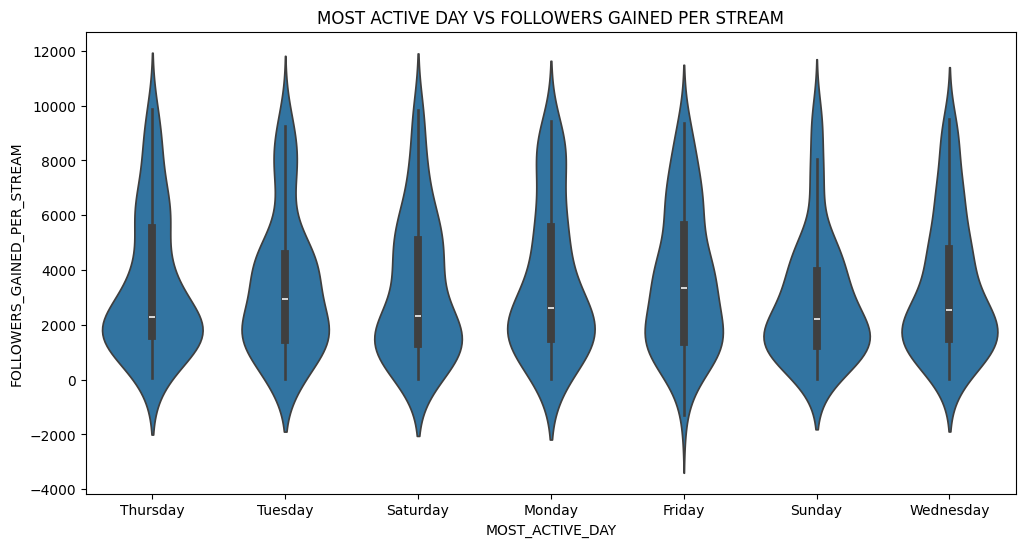

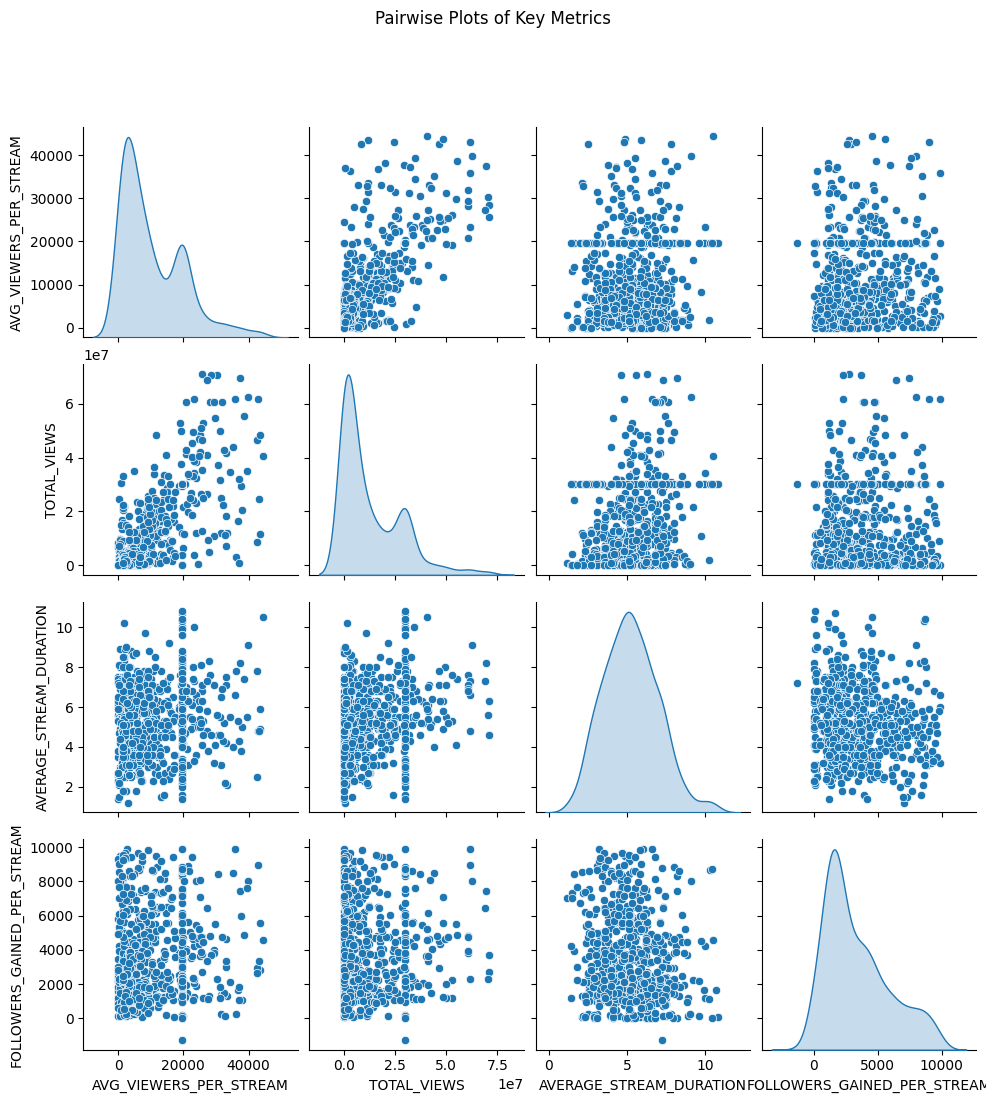

In [10]:
# Prepare bivariate plots (i.e., plots based on two variables).


#A scatter plot of *ACTIVE_DAYS_PER_WEEK* vs *TOTAL_VIEWS* columns.
plt.figure(figsize=(12,6))
sns.scatterplot(y='TOTAL_VIEWS',x='ACTIVE_DAYS_PER_WEEK',data=df)
plt.title("ACTIVE_DAYS_PER_WEEK VS TOTAL_VIEWS")
plt.show()

#A violinplot of *TYPE* vs *AVG_VIEWERS_PER_STREAM* columns.
plt.figure(figsize=(12, 6))
sns.violinplot(x='TYPE', y='AVG_VIEWERS_PER_STREAM', data=df)
plt.title('Distribution of Average Viewers Per Stream by Type')
plt.xlabel('Type of Stream')
plt.ylabel('Average Viewers Per Stream')
plt.show()

#A violinplot of *MOST_ACTIVE_DAY* vs *FOLLOWERS_GAINED_PER_STREAM* columns.
plt.figure(figsize=(12, 6)) 
sns.violinplot(x='MOST_ACTIVE_DAY', y='FOLLOWERS_GAINED_PER_STREAM', data=df)  
plt.title("MOST ACTIVE DAY VS FOLLOWERS GAINED PER STREAM") 
plt.show()

sns.pairplot(df[['AVG_VIEWERS_PER_STREAM', 'TOTAL_VIEWS', 'AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM']], diag_kind='kde')
plt.suptitle('Pairwise Plots of Key Metrics', y=1.1)
plt.show()

Filtered languages: ['Russian' 'Italian' 'Chinese' 'Korean' 'Hungarian']


<Figure size 1400x1000 with 0 Axes>

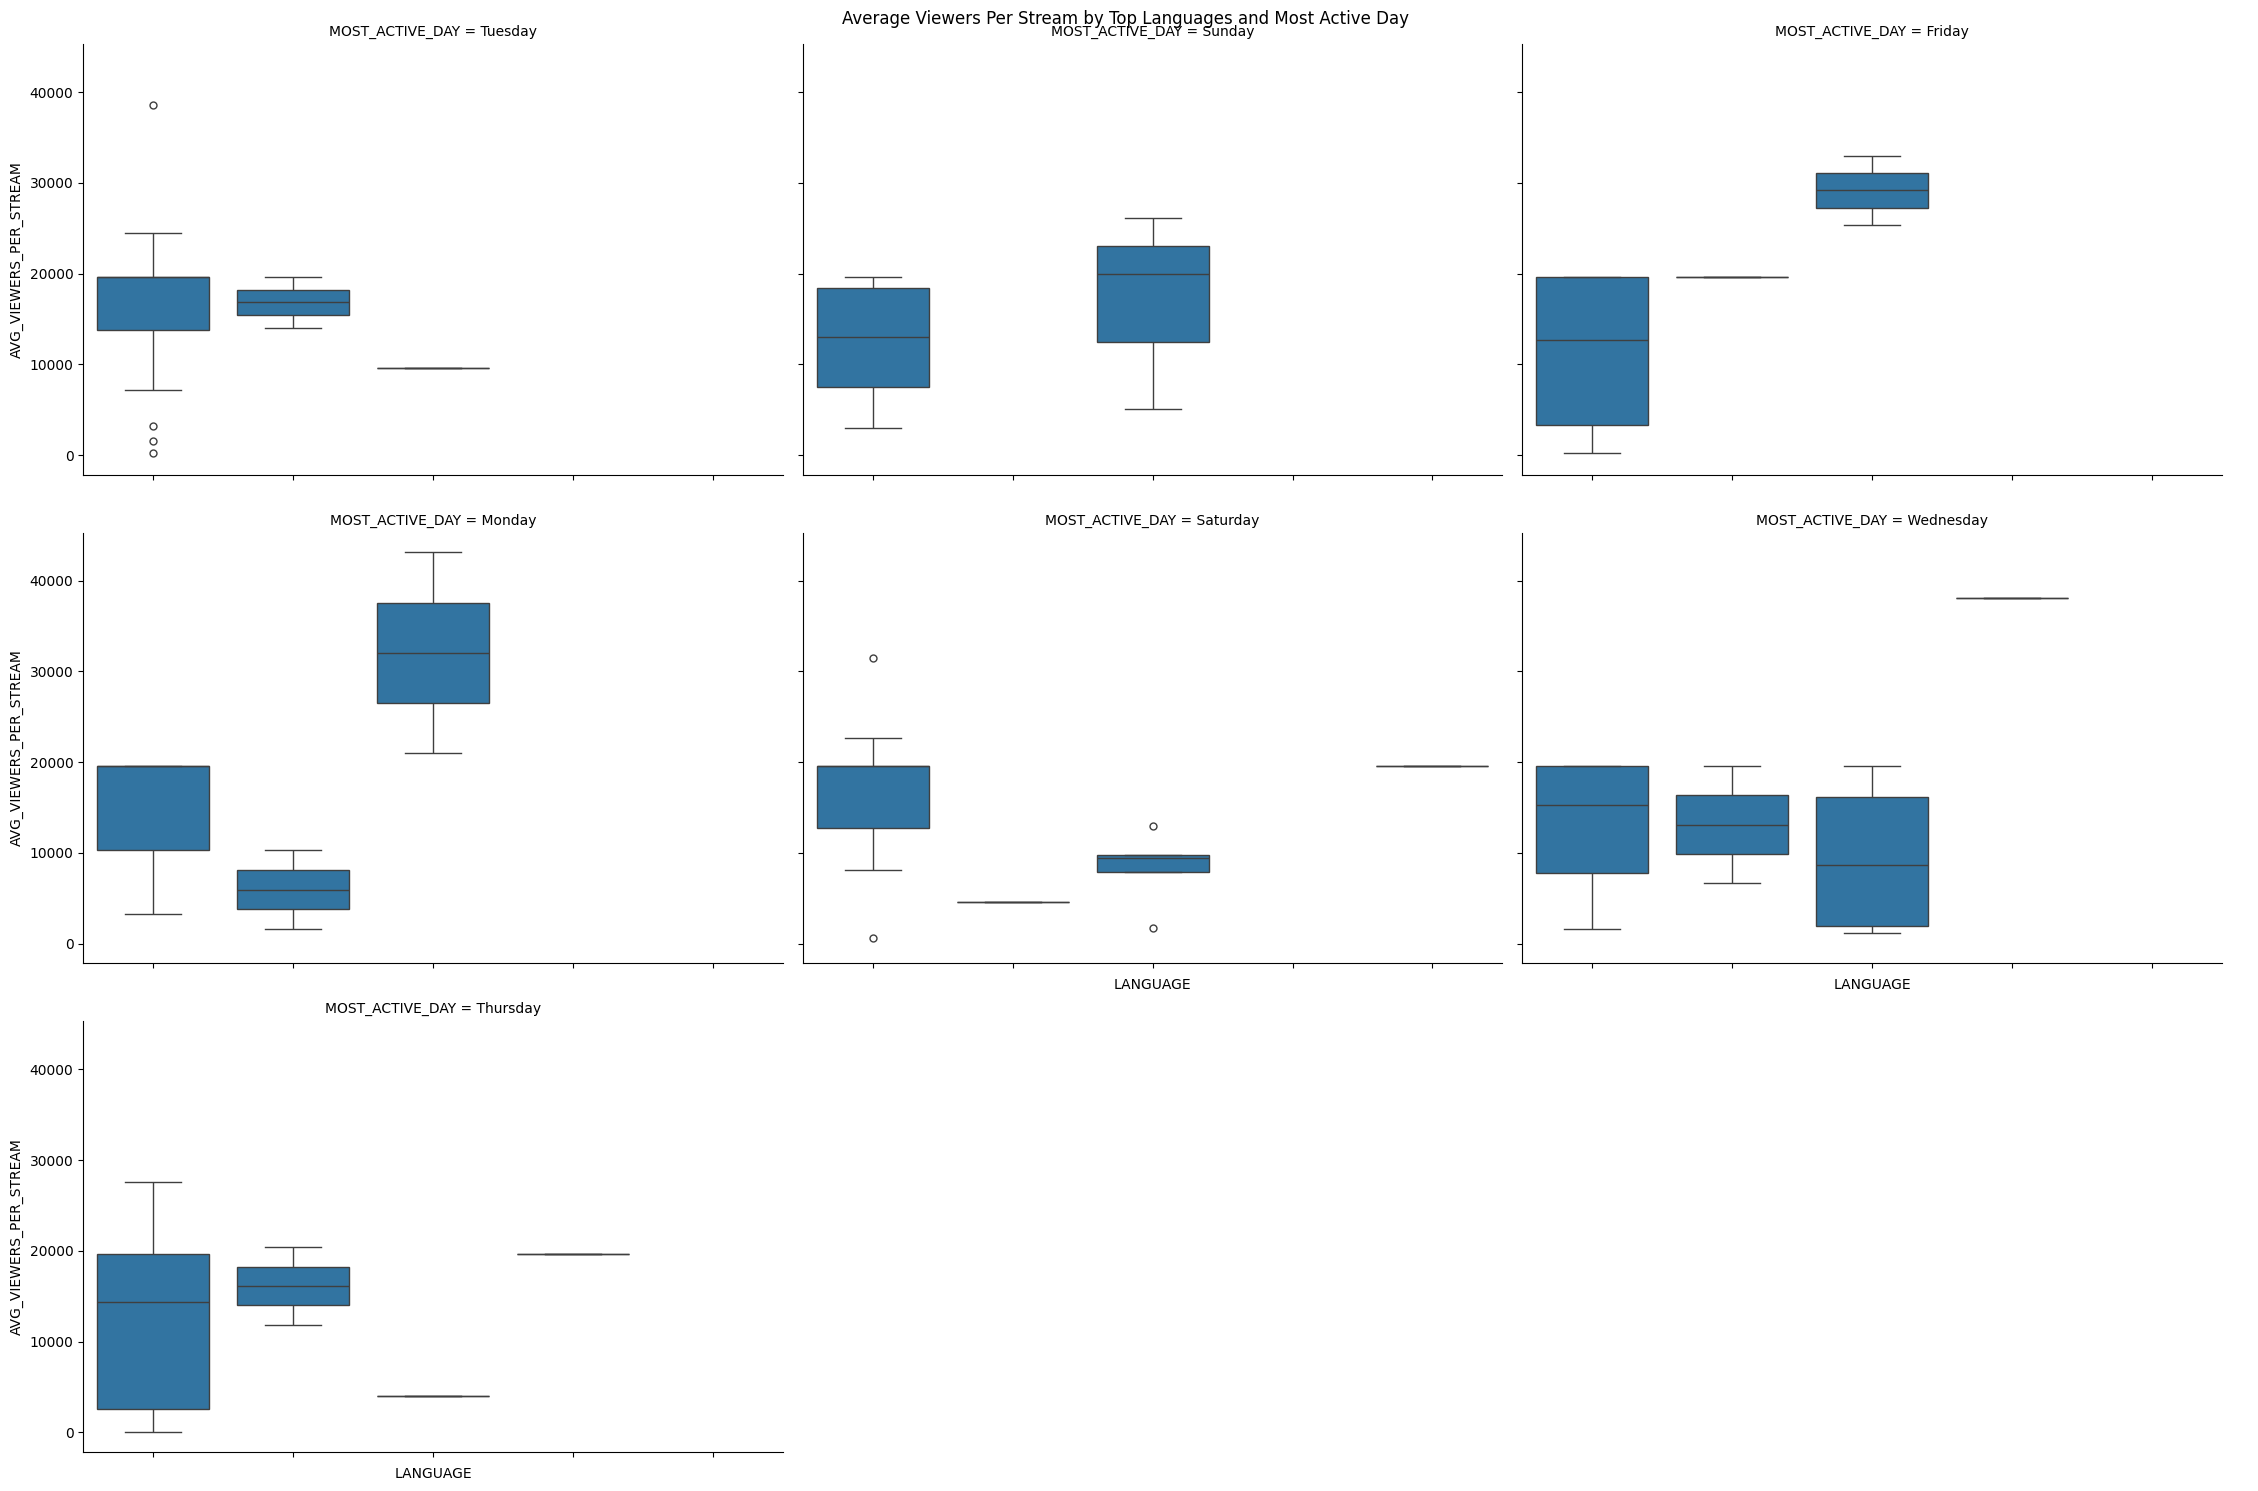

<Figure size 1000x1000 with 0 Axes>

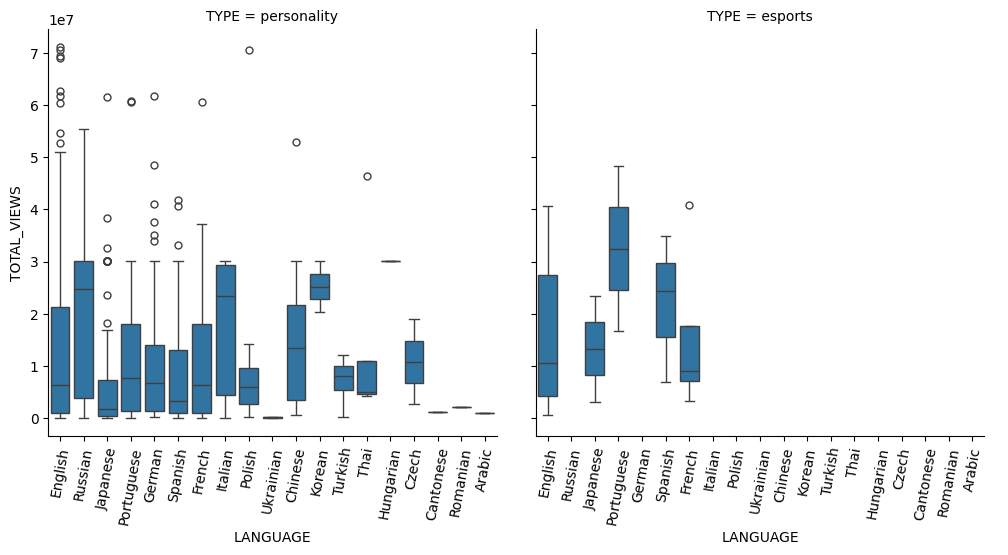

In [11]:
#Portray advance graphs (i.e., graphs based on more than two variables).
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'LANGUAGE' and calculate the mean of 'AVG_VIEWERS_PER_STREAM', then get the top 5
top_languages = df.groupby('LANGUAGE')['AVG_VIEWERS_PER_STREAM'].mean().nlargest(5).index

# Filter the DataFrame to only include rows with the top 5 languages
filtered_df = df[df['LANGUAGE'].isin(top_languages)]
print("Filtered languages:", filtered_df['LANGUAGE'].unique())

# Creating a boxplot using AVG_VIEWERS_PER_STREAM  and Top Five Languages Differentiated by MOST_ACTIVE_DAY
plt.figure(figsize=(14, 10))  # Increase figure size to give more room for labels
g = sns.catplot(x="LANGUAGE", y="AVG_VIEWERS_PER_STREAM", col="MOST_ACTIVE_DAY",
                data=filtered_df, kind="box", col_wrap=3, height=5, aspect=1.5)
g.set_xticklabels(rotation=45, ha="right")  # Adjust rotation and horizontal alignment
g.fig.suptitle('Average Viewers Per Stream by Top Languages and Most Active Day', y=1)

# A boxplot analysis of total views gianed compared to the language, distributed among the type of the stream
plt.figure(figsize=(10,10))
g=sns.catplot(x="LANGUAGE", y="TOTAL_VIEWS", col="TYPE", data=df, kind="box")
g.set_xticklabels(rotation=80)
plt.show()


In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])  # Ensure you're scaling only numeric data

# Since the data is already standardized, we'll directly perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

display(principalDf)

Explained Variance Ratio: [0.27983753 0.20360828]


Principal Component 1  Principal Component 2
0                 0.565198               0.323012
1                -0.068200               2.624841
2                 1.516386               1.762592
3                -0.998982               0.992563
4                 0.418310              -1.256737
..                     ...                    ...
697              -0.550472              -1.102973
698              -1.916085              -0.829101
699              -0.899642               2.746897
700              -1.348704               2.721782
701               0.215639               0.169624

[702 rows x 2 columns]

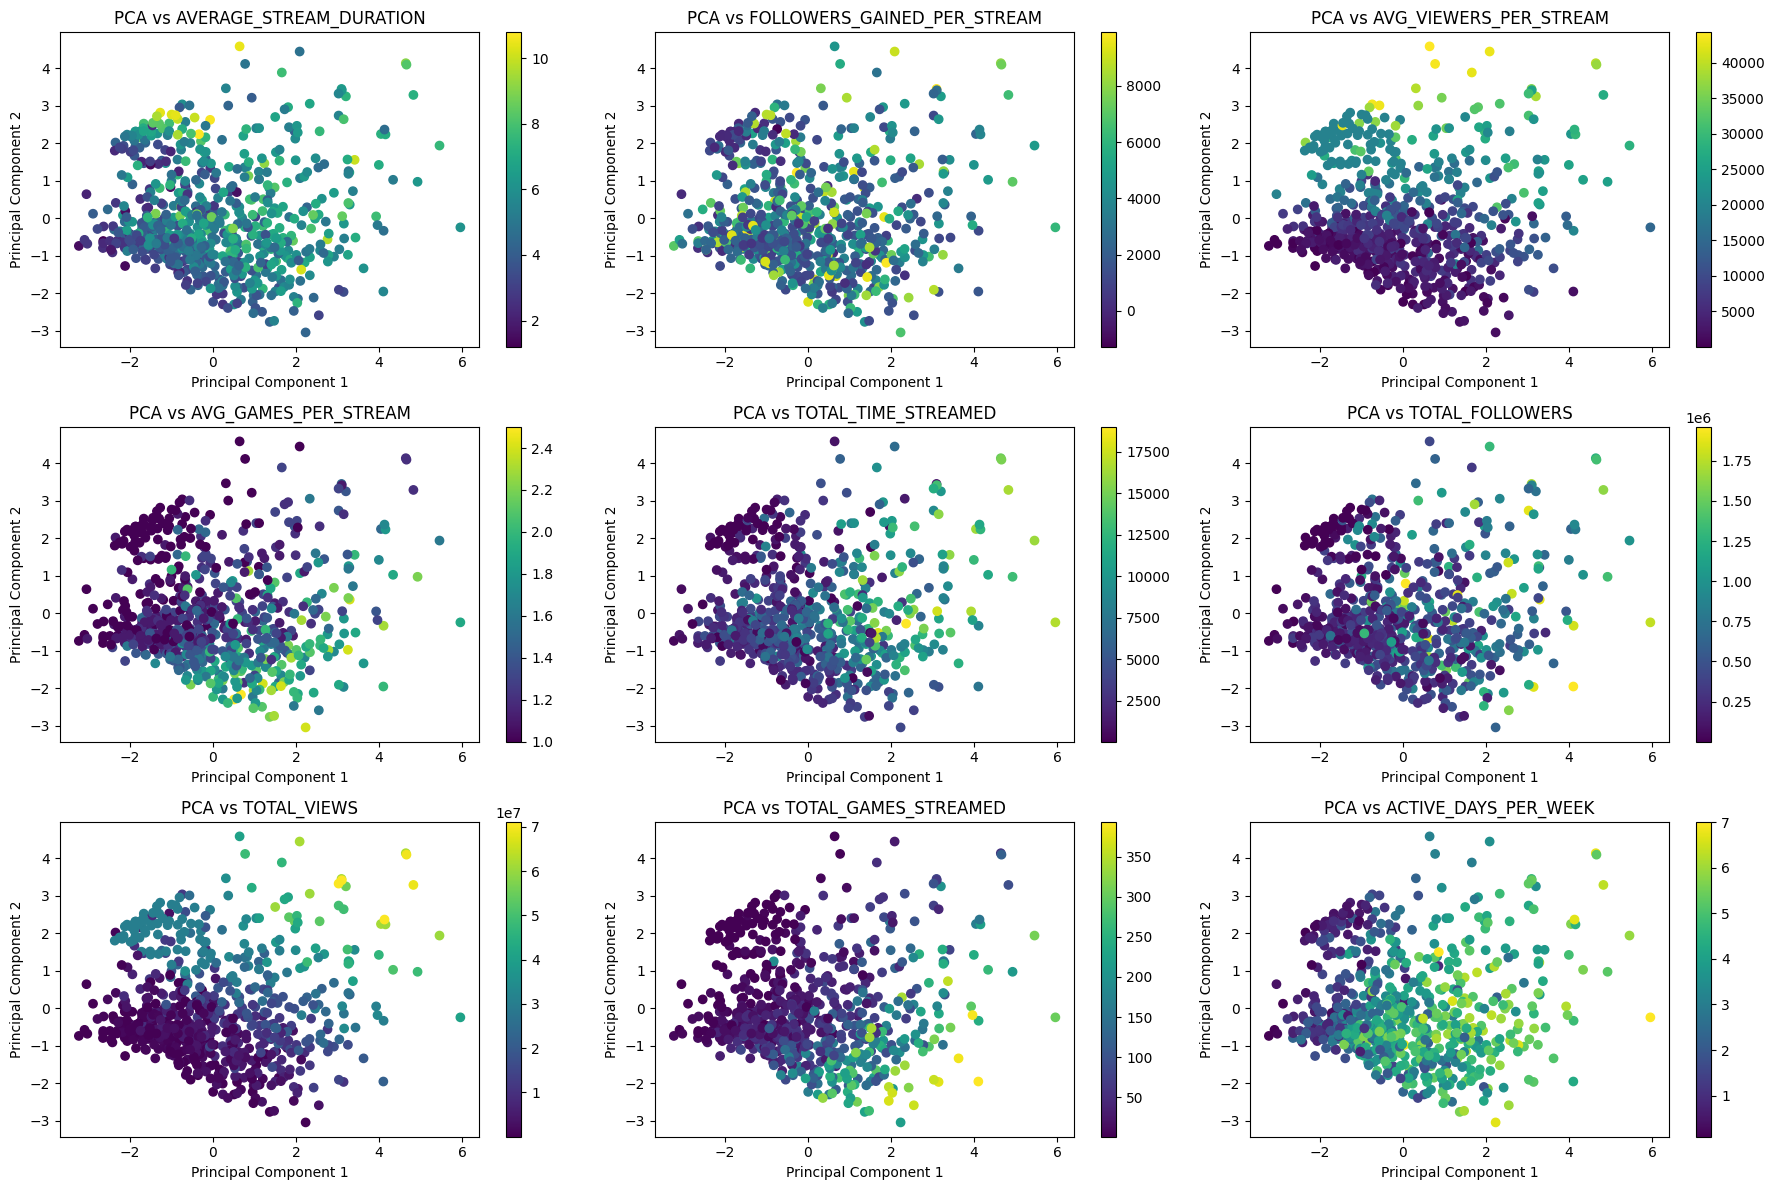

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Define the list of features to compare with PCA
features_to_compare = ['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'AVG_VIEWERS_PER_STREAM', 
                       'AVG_GAMES_PER_STREAM', 'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS', 
                       'TOTAL_GAMES_STREAMED', 'ACTIVE_DAYS_PER_WEEK']

# Create subplots to compare PCA with each of the features
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features_to_compare):
    scatter = axes[i].scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], 
                              c=df[feature], cmap='viridis')
    axes[i].set_title(f'PCA vs {feature}')
    fig.colorbar(scatter, ax=axes[i])
    axes[i].set_xlabel('Principal Component 1')
    axes[i].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

The new values for LANGUAGE are [ 4 14  9 12  6 15  5  8 11 18  2 10 17 16  7  3  1 13  0]
The new values for TYPE are [1 0]
The new values for MOST_STREAMED_GAME are [40 16  2 32 38 83 76 75 71 62 77 10 20 18 43 25 28  4 78 34 31 14 82 46
 30  7 22  5 13 26 64 81 66 73 49 41  1 19 51 35 47  6 68 69 74  8 56 85
 86 67 24 12 48 80 61 11  0 17 53 50 79 42 45 70 15 39 54 27  9 58 84 52
 63 65 36 57 23 60 44 21 59 72  3 29 37 55 33]
The new values for 2ND_MOST_STREAMED_GAME are [ 58  61 124 126  69 127  48  15  20 122 100 131  42  51  76 115 107  62
  70  34  99  49 117 121 114 130  13  32  30  87 106 108   5  10  92  40
 101  59  36  86 110  96  23  84  45 134  35  71 125 116  63 136 109 129
  21   4  77  89  28  60  65  56   9  74  11 113 112  44  24  75 104 135
  57  97  46  39  72  98  29  78  16  25  19  66  54  91  67 102   3  41
  43  27 111  88  81  52   6  31  79  95  12   7  33  17 132 123  82 103
 118  50  85 119  93  53  68  37  73  83  55  38  47 120  26 128  18 133
   8  14  

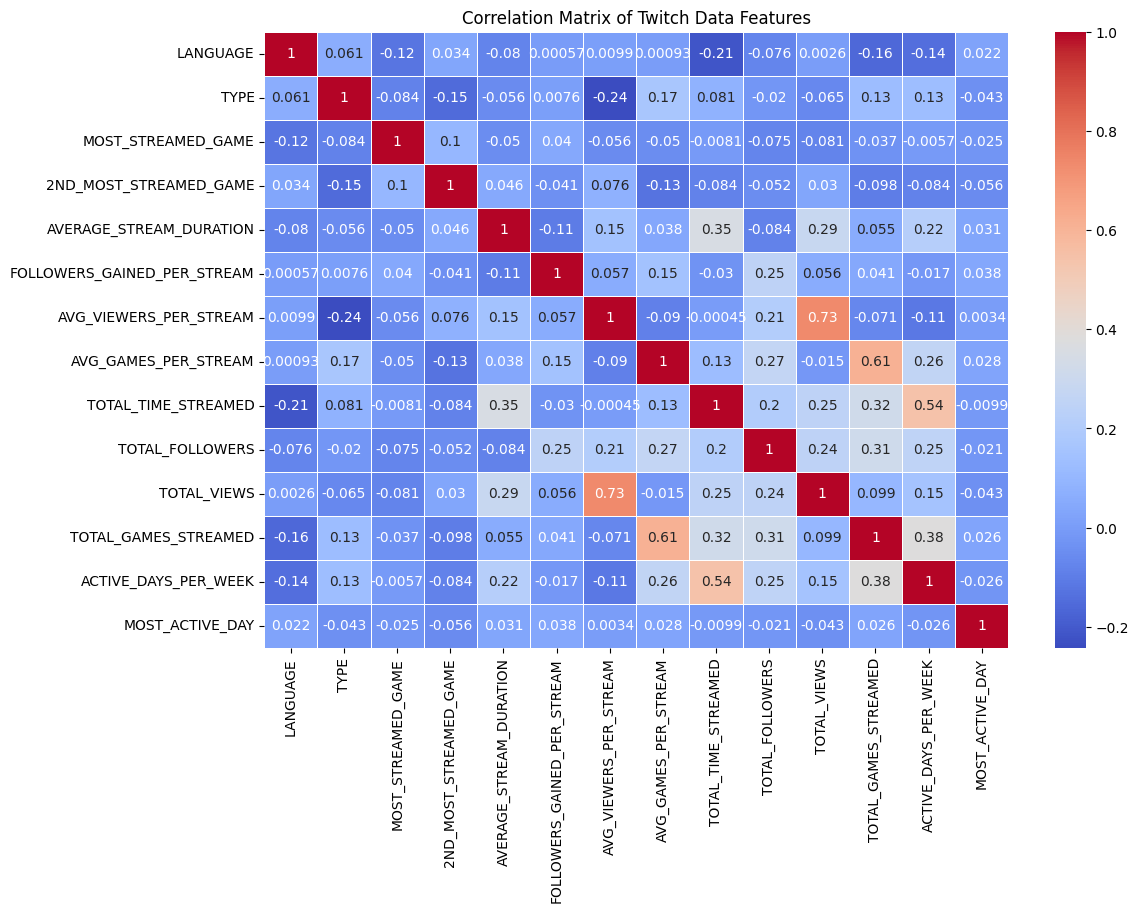

In [14]:
# Calculate the correlation matrix
from sklearn.preprocessing import LabelEncoder

# Columns to be encoded
columns_to_encode = ['LANGUAGE', 'TYPE', 'MOST_STREAMED_GAME', '2ND_MOST_STREAMED_GAME']

# Applying LabelEncoder to each column individually
for column in columns_to_encode:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    print(f'The new values for {column} are', df[column].unique())
# Define the mapping for days of the week
day_mapping = {'Sunday': 1,'Monday': 2,'Tuesday': 3,'Wednesday': 4,'Thursday': 5,'Friday': 6,'Saturday': 7}

df['MOST_ACTIVE_DAY'] = df['MOST_ACTIVE_DAY'].map(day_mapping)

cdf = df.drop('NAME', axis=1)

correlation_matrix = cdf.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Twitch Data Features')
plt.show()

## Summary of Findings

<span style="color:blue">1. **High Average Stream Duration:**</span> Streamers with higher average stream durations tend to have higher ranks and greater follower growth per stream.

<span style="color:blue">2. **Followers Gained Per Stream:**</span> There is a significant correlation between followers gained per stream and the total number of followers. Streamers who gain more followers per stream generally have a larger total follower base.

<span style="color:blue">3. **Average Viewers Per Stream:**</span> Streamers with higher average viewers per stream often have higher ranks and are more likely to stream popular games. This feature shows a strong correlation with the total views.

<span style="color:blue">4. **Games Streamed:**</span> Streamers who play a variety of games tend to have higher engagement and follower growth. However, those who focus on fewer games often have more consistent viewership.

<span style="color:blue">5. **Total Time Streamed:**</span> Streamers who spend more total time streaming generally have higher ranks and more total followers, indicating that consistency and availability are key factors in gaining a larger audience.

<span style="color:blue">6. **Total Followers:**</span> Streamers with a large total follower count tend to have high average viewers per stream and significant follower growth, reinforcing the importance of follower base for sustained engagement.

<span style="color:blue">7. **Total Views:**</span> The total views a streamer receives is strongly correlated with their total follower count and average viewers per stream. High total views often accompany high ranks and greater popularity.

<span style="color:blue">8. **Active Days Per Week:**</span> Streamers who are active more days per week generally have higher ranks and more consistent follower growth, suggesting that frequent streaming is beneficial for maintaining audience on the platform.

<span style="color:blue">9. **PCA Analysis:** </span>These PCA results suggest that viewer engagement metrics like total views and followers, along with streaming frequency and duration, are critical in shaping the streaming landscape on Twitch. 
Streams that manage to secure higher viewership and followership appear to significantly influence the overall variability in the data, pointing to the importance of content appeal and audience retention strategies. 
Meanwhile, the operational aspects like streaming frequency and duration also play crucial roles but influence different components of variability, suggesting nuanced impacts on stream success.

<span style="color:blue">10. **Correlation:** </span> Encoded categorical columns are not correlated with numerical columns.

These findings highlight the importance of consistency, engagement, and variety in content for achieving higher ranks and follower growth on Twitch. Frequent streaming and engaging with a wide range of games can significantly enhance a streamer's popularity and success on the platform.


# <span style="color:blue"> 4. Model Building:
************</span>

Mean Squared Error: 0.812806051794376
R2 Score: 0.011603232092476379


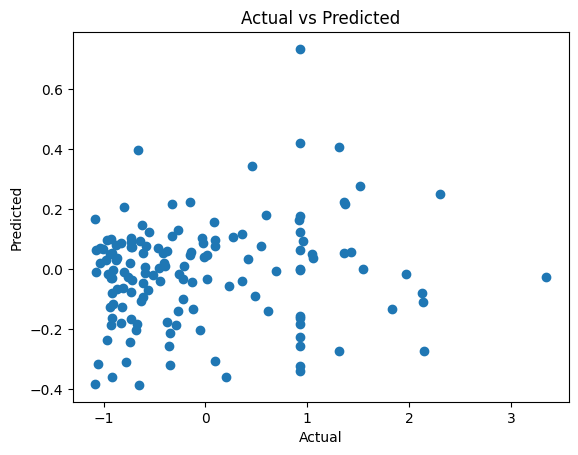

                             Coefficient
AVERAGE_STREAM_DURATION         0.186022
FOLLOWERS_GAINED_PER_STREAM     0.071922
TOTAL_TIME_STREAMED            -0.042411


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


X = cdf[['AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM', 'TOTAL_TIME_STREAMED']]  # Features
y = cdf[ 'AVG_VIEWERS_PER_STREAM']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scailing the dataset before calculating the MSE
scaler = StandardScaler()
scaler.fit(np.c_[X_train,y_train])
A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

#  the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Coefficients and interpretation
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=600)  # Alpha is the regularization strength; larger values specify stronger regularization
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('R2 Score:', r2_score(y_test, y_pred_ridge))

MSE: 0.8156011285951045
R2 Score: 0.008204334077637099


In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('R2 Score:', r2_score(y_test, y_pred_lasso))

MSE: 0.8196077795079699
R2 Score: 0.003332125260210761


In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # cv is the number of folds
print("Cross-validated scores:", scores)

Cross-validated scores: [-0.03717862  0.04228371  0.00276274 -0.02080955  0.02015022]


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Decision Tree Regressor for a continuous target
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print("Decision Tree Regressor Results:")
print("MSE: ", mean_squared_error(y_test, y_pred_dtr))

Decision Tree Regressor Results:
MSE:  1.5630815245195269


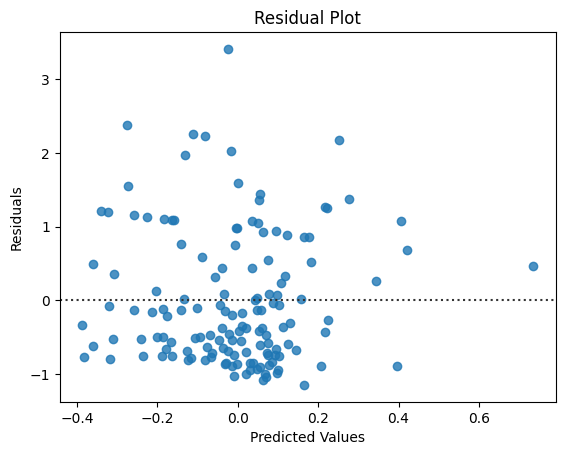

In [20]:
import seaborn as sns

#  residuals
residuals = y_test - y_pred


sns.residplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

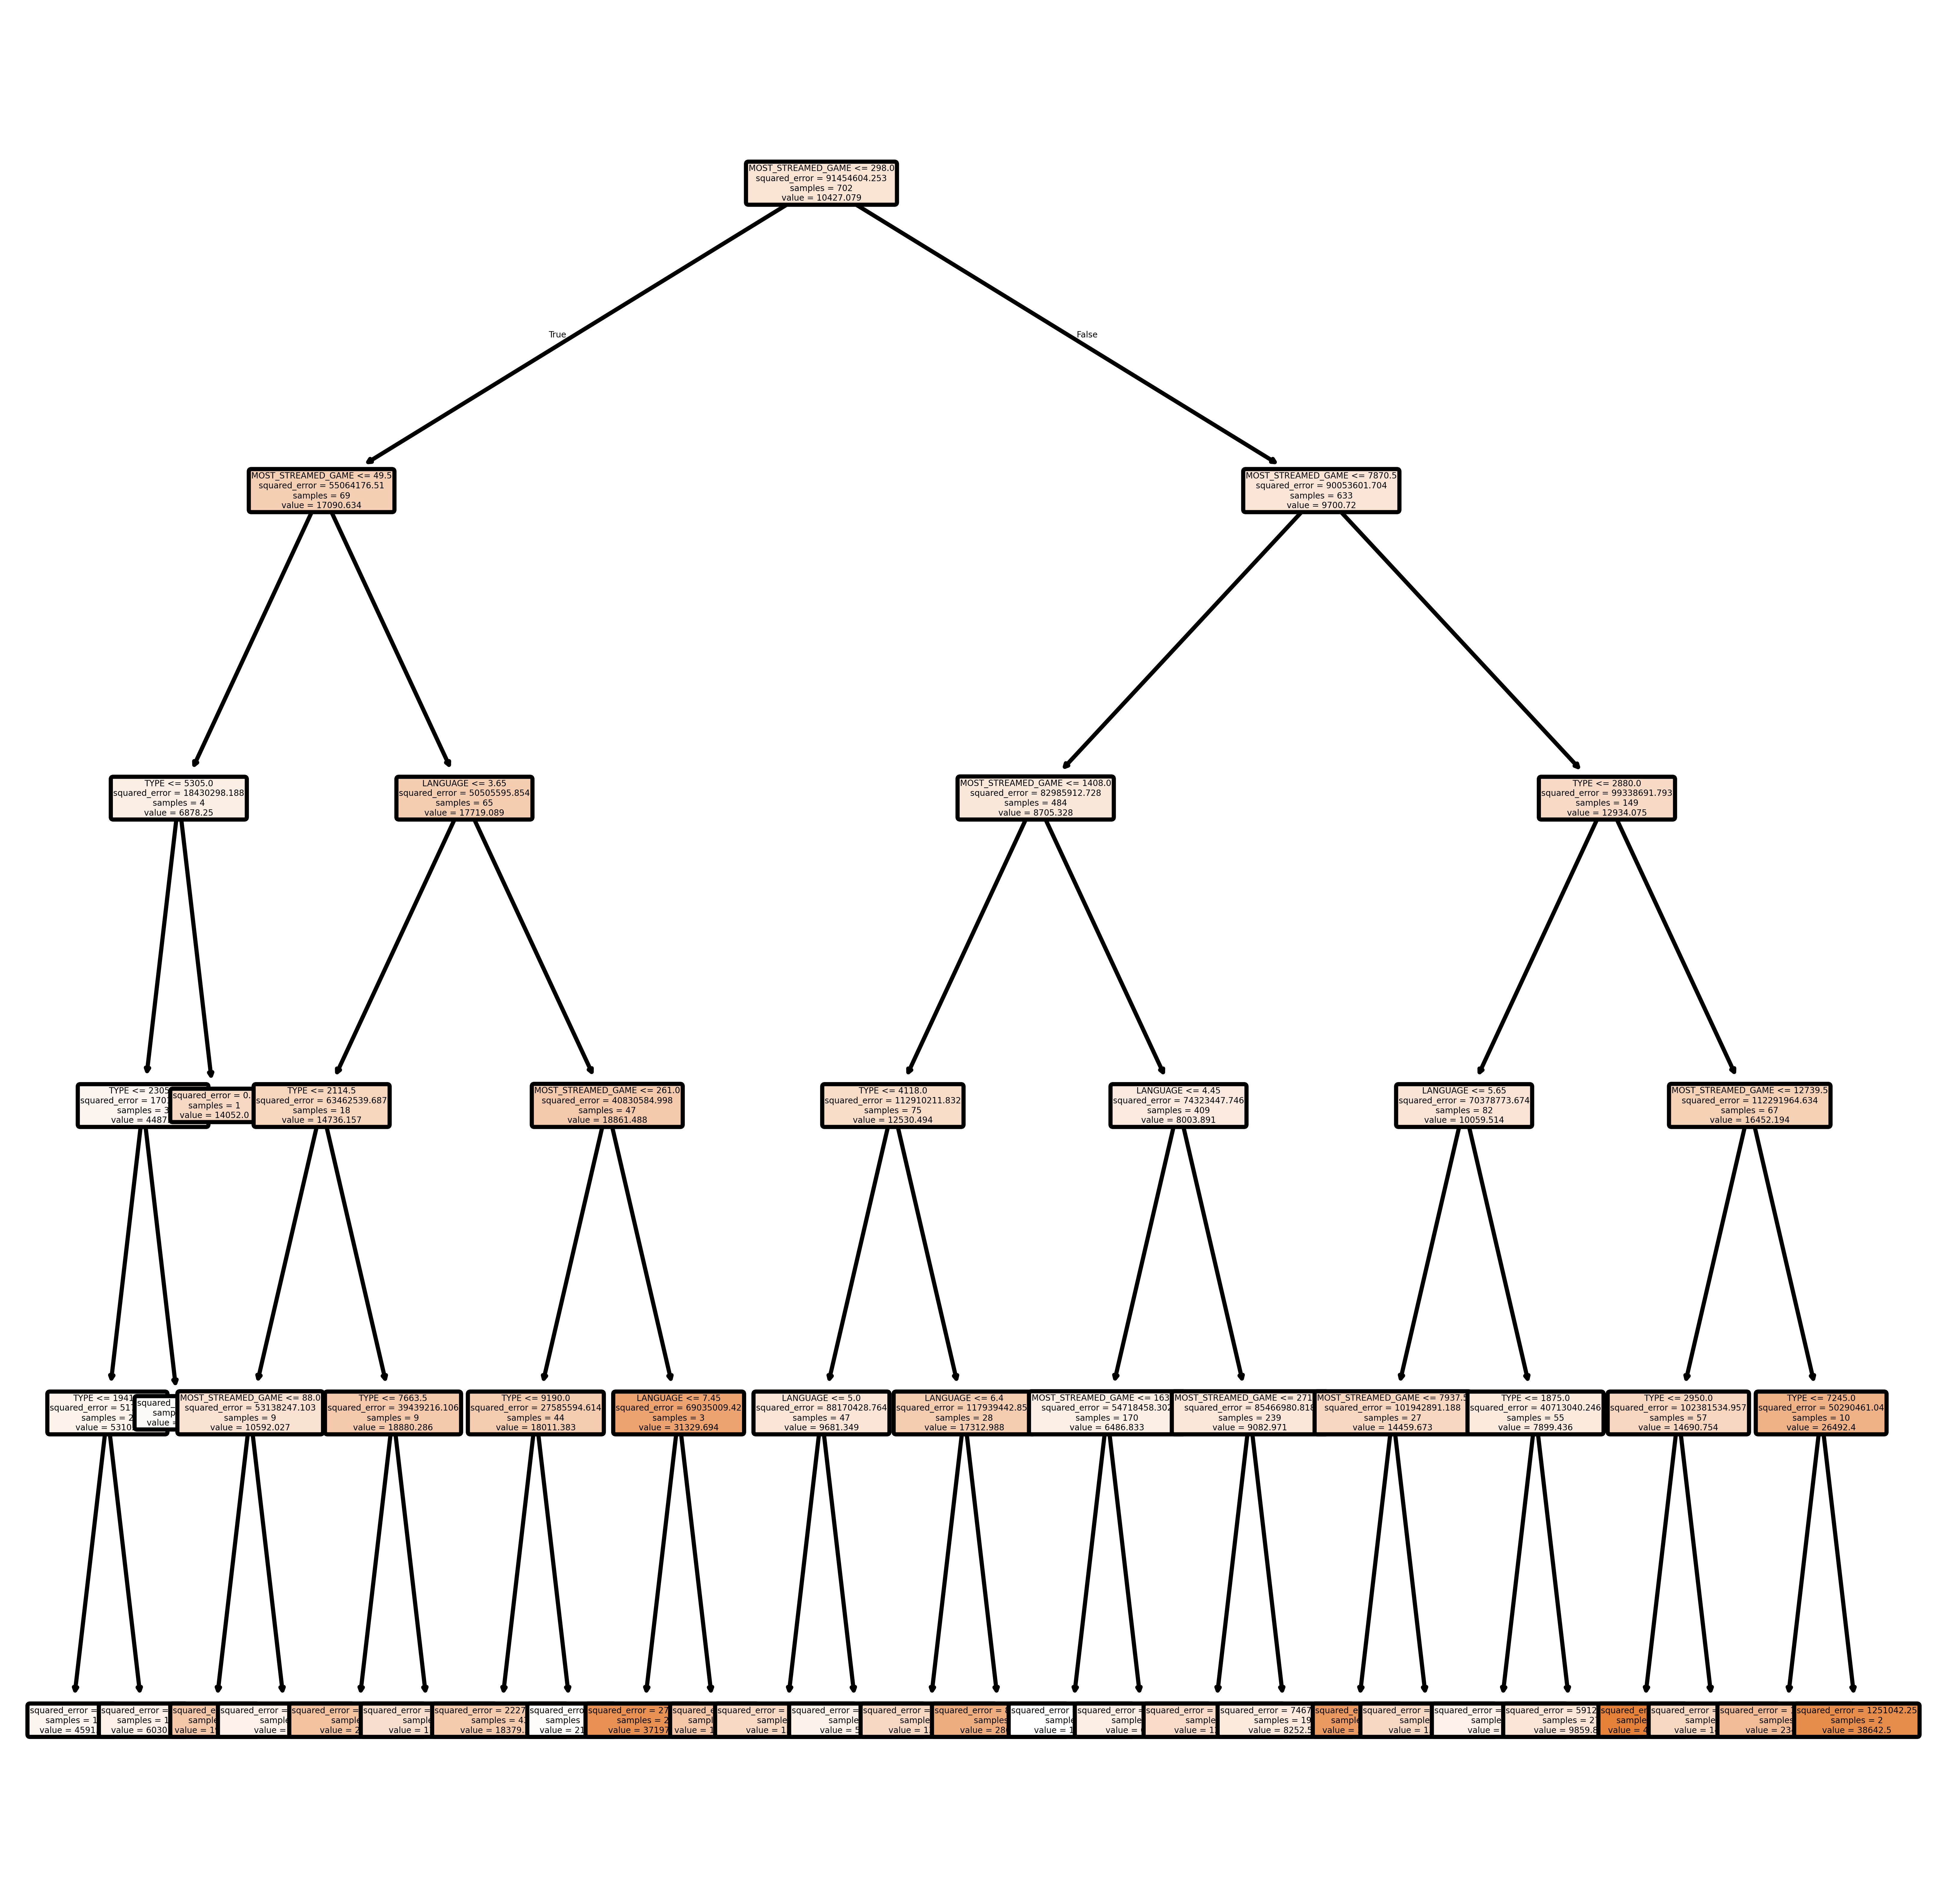

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


# Train
dtReg = DecisionTreeRegressor(max_depth=5)
dtReg.fit(X, y)

plt.figure(figsize=(8, 8), dpi=1000)
plot_tree(dtReg, feature_names=cdf.columns[:-1].tolist(), filled=True, rounded=True, max_depth=12, fontsize=2)
plt.show()

# <span style="color:blue">5. Communicate results:
**********</span>
#### a. **Provide** the summary and conclusion of your analysis.
    
#### b. Give possible future recommendations.


#### **A. Summary of the analysis:** 

 <span style="color:gray"> The problem was understanding streamer performance on Twitch and 
developing a predictive model with variables such as average stream duration, followers gained 
per stream, total views, etc.
We first handled missing Values and detect the outlier and removed them and cleaned them, then we starting analysing the data with Exploratory Data Analysis (EDA).
For univariate Analysis: Histograms and boxplots for numerical columns.
Categorical Data Analysis: Bar plots for categorical columns.
Bivariate Analysis: Violin plots and scatter plots to explore relationships 
between variables.
Then we start modeling the data with
PCA Analysis: Standardization, PCA transformation, and explained variance. And
 Regression Models: Linear Regression, Ridge Regression, Lasso Regression, 
and Decision Tree Regressor.
Our model Performance:
 MSE: 0.812 using Linear Regression
 R² Score: 0.01. 
Our results and Discussion, 
 Stream Duration: Streamers with higher average stream durations tend 
to have higher ranks and greater follower growth per stream.
 Followers Gained: There is a significant correlation between followers 
gained per stream and the total number of followers, Streamers who gain 
more followers per stream generally have a larger total follower base.
 Total Views: The total views a streamer receives is strongly correlated 
with their total follower count and average viewers per stream. High total 
views often accompany high ranks and greater popularity.


#### **B. Recommendations**

<span style="color:red"> **Streaming Frequency:**</span>  Regular streaming enhances performance
 Content Variety

<span style="color:red"> **Content Variety:** </span> Diverse game content increases engagement


# <span style="color:blue">6. Operationalize:
**********</span>

#### A. Provide the General Guidelines to Adopt Your Methodology:

1. Dataset Selection:
   - Choose a dataset that has a mix of numerical and categorical variables related to the problem statement. Ensure the dataset has at least 300 samples for effective model training and validation.

2. Data Preprocessing:
   - Data Normalization: Standardize the data if necessary, especially before PCA or scaling models.
   - Handling Missing Data: Fill missing values with the mean for numerical columns and mode for categorical columns.
   - Outlier Cleaning: Use boxplots and IQR method to identify and remove outliers that may skew the analysis.

3. Exploratory Data Analysis (EDA):
   - Conduct univariate analysis with appropriate plots (histograms, boxplots, scatter plots) to understand variable distribution and relationships.
   - Look for key patterns and correlations to guide model selection and feature engineering.

4. Model Selection and Training:
   - Apply Principal Component Analysis (PCA) to reduce dimensionality if required.
   - Utilize cross-validation to ensure consistent model performance across different data subsets.

5. Model Evaluation:
   - Assess model performance using metrics like Mean Squared Error (MSE) and R² score.

6. Implementation:
   - Integrate the chosen model into a real-world application or decision-making process. Develop a pipeline for automated data preprocessing, model training, and prediction.

#### B. Problems and Issues in the Implementation of the Selected Methodology:

1. Data Quality and Consistency:
   - **Issue:** Inconsistent data quality, missing values, and outliers can complicate preprocessing.
   - **Solution:** Employ robust data cleaning techniques and validate data consistency before analysis.

2. Model Overfitting:
   - **Issue:** Complex models with many parameters are prone to overfitting, leading to poor generalization.
   - **Solution:** Use regularization techniques like Ridge and Lasso Regression, and apply cross-validation to prevent overfitting.

3. Computational Resources:
   - **Issue:** Advanced modeling techniques like PCA can be computationally expensive, particularly with large datasets.
   - **Solution:** Optimize code for efficiency and consider using cloud-based resources for large-scale computations.

4. Interpreting Model Results:
   - **Issue:** Interpreting complex model results, especially for non-technical stakeholders, can be challenging.
   - **Solution:** Focus on models balancing interpretability and performance. Provide visualizations and summaries to simplify model behavior explanation.

5. Scalability:
   - **Issue:** The methodology may not scale well to larger datasets or different domains without significant adaptation.
   - **Solution:** Design a flexible and modular methodology for easy adaptation to various datasets or problem domains.